In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor


In [2]:
df = pd.read_csv("BigMartTrain.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
df['Item_Weight']=df['Item_Weight'].fillna(0)

In [10]:
df['Outlet_Size']=df['Outlet_Size'].fillna(0)


In [11]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992782,1997.831867,2181.288914
std,6.431899,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot: >

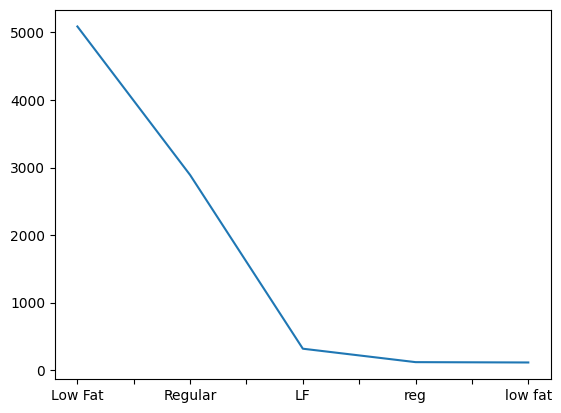

In [13]:
df['Item_Fat_Content'].value_counts().plot()

In [14]:
df =  df.replace(to_replace ="low fat",  value ="Low Fat") 
df =  df.replace(to_replace ="LF",  value ="Low Fat") 
df =  df.replace(to_replace ="reg",  value ="Regular") 

In [15]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,0,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<AxesSubplot: >

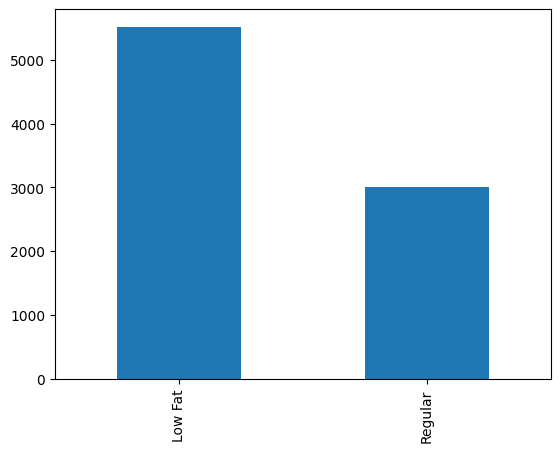

In [16]:
df['Item_Fat_Content'].value_counts().plot(kind = 'bar')

<AxesSubplot: >

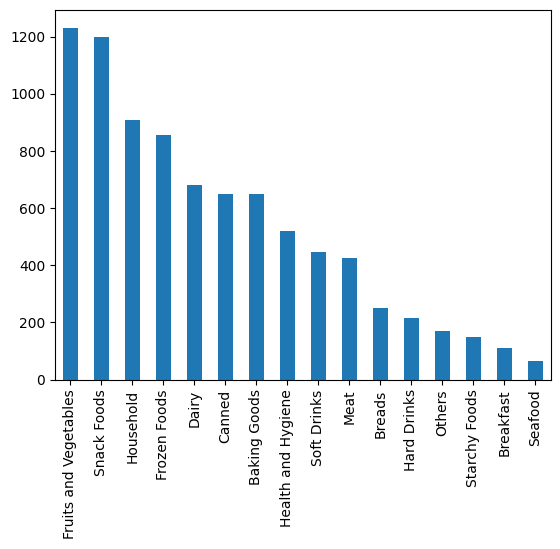

In [17]:
df['Item_Type'].value_counts().plot(kind='bar')

<AxesSubplot: >

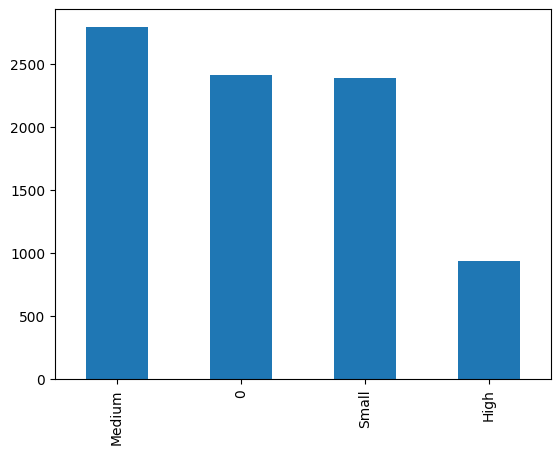

In [18]:
df['Outlet_Size'].value_counts().plot(kind='bar')

<AxesSubplot: >

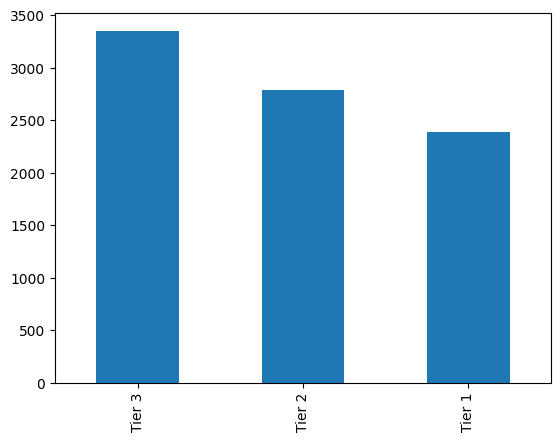

In [19]:
df['Outlet_Location_Type'].value_counts().plot(kind='bar')

<AxesSubplot: >

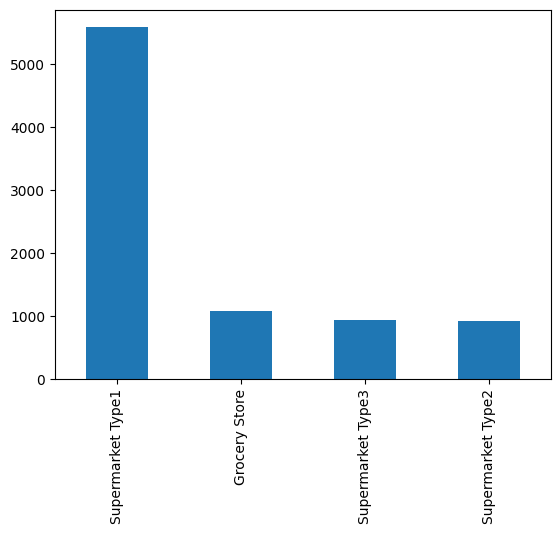

In [20]:
df['Outlet_Type'].value_counts().plot(kind='bar')

<AxesSubplot: >

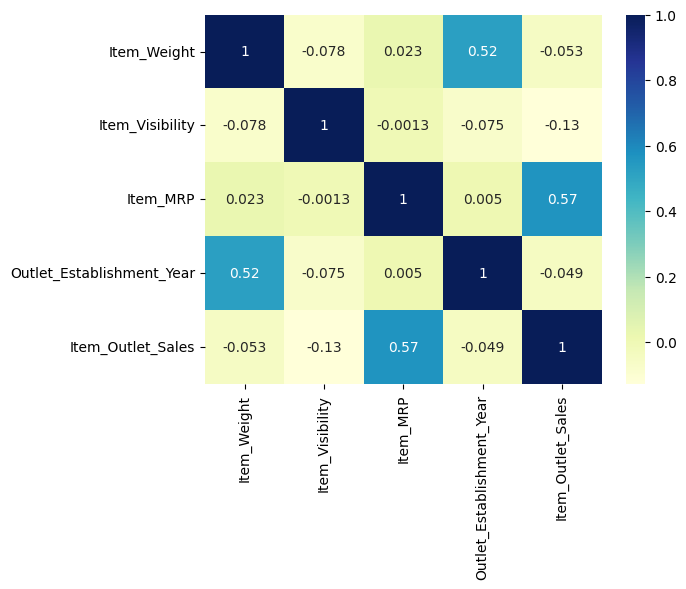

In [21]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [22]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [23]:
categorical_columns=[x for x in df.dtypes.index if df.dtypes[x]=='object']


In [24]:
categorical_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [25]:
for col in categorical_columns:
    print('------------------- Frequency of categories for variable -----------------')
    print( df[col].value_counts())

------------------- Frequency of categories for variable -----------------
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
------------------- Frequency of categories for variable -----------------
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
------------------- Frequency of categories for variable -----------------
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
--------------

In [26]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
df["Item_Outlet_Sales"] = df["Item_Outlet_Sales"].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   int32  
dtypes: float64(3), int32(1), int64(1), object(7)
memory usage: 765.9+ KB


In [30]:
df["Outlet_Size"] = df["Outlet_Size"].astype('|S')

In [31]:
df["Outlet_Location_Type"] = df["Outlet_Location_Type"].astype('|S')

In [32]:
df["Outlet_Type"] = df["Outlet_Type"].astype('|S')

In [33]:
# df["Outlet_Type"].astype('|S')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   |S6    
 9   Outlet_Location_Type       8523 non-null   |S6    
 10  Outlet_Type                8523 non-null   |S17   
 11  Item_Outlet_Sales          8523 non-null   int32  
dtypes: bytes136(1), bytes48(2), float64(3), int32(1), int64(1), object(4)
memory usage: 807.5+ KB


In [35]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
    print (df[col])

0        156
1          8
2        662
3       1121
4       1297
        ... 
8518     370
8519     897
8520    1357
8521     681
8522      50
Name: Item_Identifier, Length: 8523, dtype: int32
0       285
1        58
2       376
3       393
4       266
       ... 
8518    126
8519    234
8520    300
8521    150
8522    347
Name: Item_Weight, Length: 8523, dtype: int64
0       0
1       1
2       0
3       1
4       0
       ..
8518    0
8519    1
8520    0
8521    1
8522    0
Name: Item_Fat_Content, Length: 8523, dtype: int32
0        664
1        880
2        715
3          0
4          0
        ... 
8518    3912
8519    3278
8520    2302
8521    7175
8522    3108
Name: Item_Visibility, Length: 8523, dtype: int64
0        4
1       14
2       10
3        6
4        9
        ..
8518    13
8519     0
8520     8
8521    13
8522    14
Name: Item_Type, Length: 8523, dtype: int32
0       5592
1        473
2       2901
3       4227
4        627
        ... 
8518    4955
8519    2023
8520  

In [36]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [37]:
df=pd.get_dummies(df, columns=['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type'],drop_first=False)

print(df.shape)

(8523, 36)


In [38]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4',
       'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8',
       'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12',
       'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Size_3',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

In [39]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,...,Outlet_Size_1,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,156,285,664,5592,9,4,2202,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8,58,880,473,3,8,341,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,662,376,715,2901,9,4,1393,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,1121,393,0,4227,0,3,553,0,1,0,...,0,0,0,0,0,1,1,0,0,0
4,1297,266,0,627,1,1,720,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [40]:
X = df.iloc[:,0:35].values
y = df.iloc[:,-1].values

In [41]:
X

array([[ 156,  285,  664, ...,    0,    1,    0],
       [   8,   58,  880, ...,    0,    0,    1],
       [ 662,  376,  715, ...,    0,    1,    0],
       ...,
       [1357,  300, 2302, ...,    0,    1,    0],
       [ 681,  150, 7175, ...,    0,    0,    1],
       [  50,  347, 3108, ...,    0,    1,    0]], dtype=int64)

In [42]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size= 0.7 ,test_size=0.3,random_state=10)

In [44]:
X_train.shape

(5966, 35)

In [45]:
y_train.shape

(5966,)

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[6.10110202e-01 3.23812118e-01 4.25978550e-02 2.12372524e-02
 2.24084525e-03 8.42637669e-07 6.24808288e-07 5.98263283e-08
 4.86394641e-08 2.57829526e-08 1.67954034e-08 1.52266354e-08
 1.29577528e-08 1.18070783e-08 9.66458217e-09 9.12427598e-09
 8.06420821e-09 7.97492379e-09 6.25253406e-09 5.12224770e-09
 3.88952418e-09 3.73537670e-09 3.42618354e-09 2.57293075e-09
 1.91291927e-09 1.82026838e-09 1.46813295e-09 1.43237668e-09
 1.38284772e-09 7.19624207e-10 5.70883123e-33 5.70883123e-33
 5.70883123e-33 5.70883123e-33 5.70883123e-33]


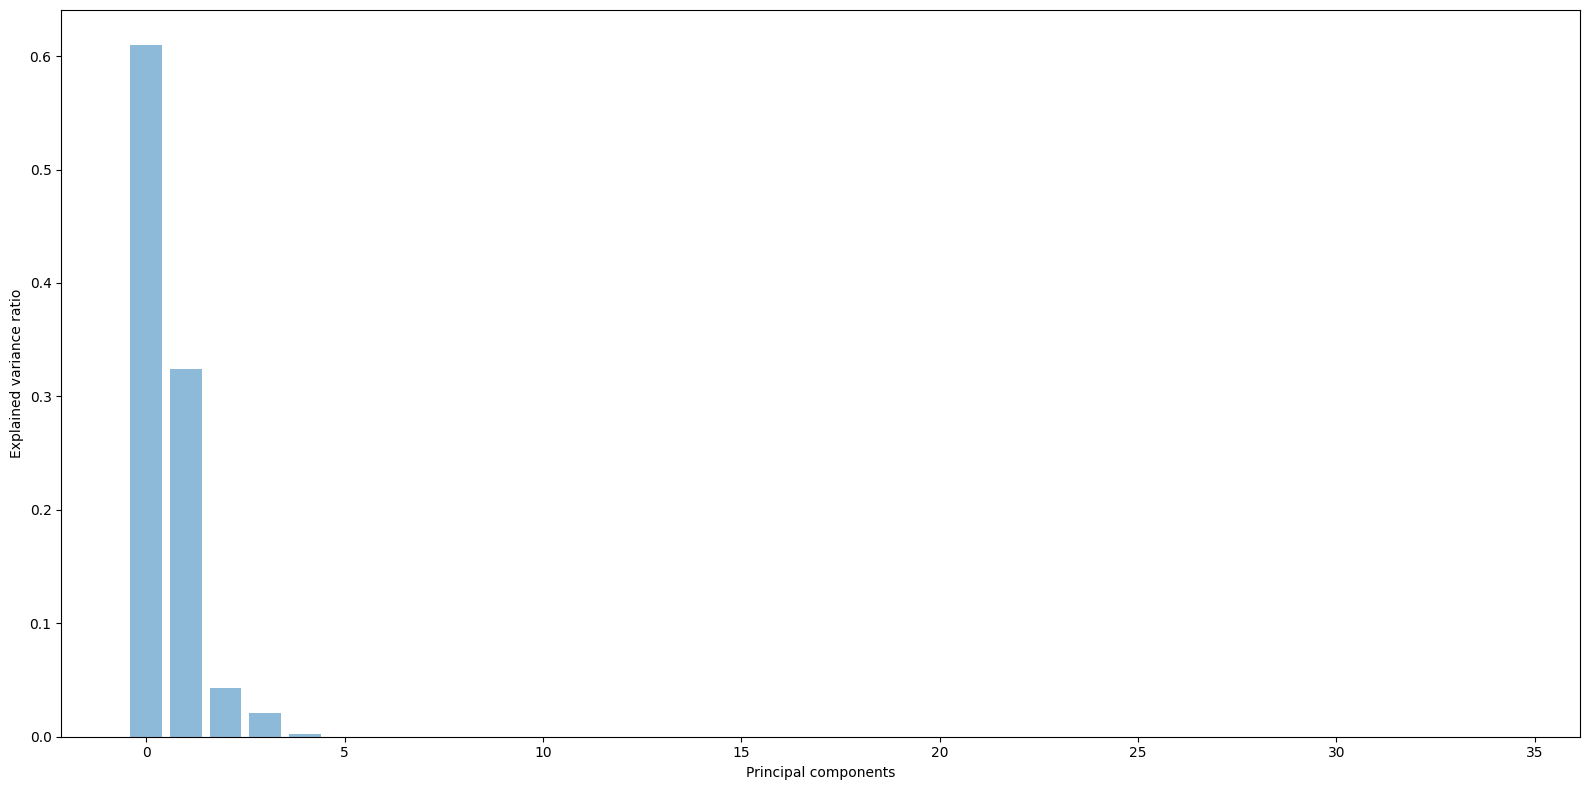

In [47]:
plt.figure(figsize=(16, 8))  
plt.bar(range(35), explained_variance, alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.tight_layout()

In [48]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.6101102  0.32381212 0.04259785]


In [49]:
lr = LinearRegression()


In [50]:
lr.fit(X_train , y_train)

LinearRegression()

In [51]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)


DecisionTreeRegressor()

In [52]:
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)